# Data Visualiztion Course Final Projet
> by Kfir Goldfarb

<a href="https://github.com/kggold4"><img src="images/github.png" width="25px" height="25px" align="left"></a>
<a href="https://www.linkedin.com/in/kfir-goldfarb/"><img src="images/in.png"  width="25px" height="25px" align="left"></a>
<a href="mailto:kfir.goldfarb@msmail.ariel.ac.il"><img src="images/email.png" width="25px" height="25px" align="left"></a>
<a href="https://www.youtube.com/channel/UCypEWlruyG_I5A48GqB5c6g"><img src="images/youtube.png" width="25px" height="25px" align="left"></a>


<br>

# Jupyter Notebook Number 1
<i>Improving My <a href="https://github.com/kggold4/final-project-intro-data-science/blob/main/notebook3.ipynb">Introduction to Data Science Course Final Project Classification Problem</a></i>

# First let's start this task like the original task

In [1]:
# libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

the dataset I'm using for the classification problem is from:
https://www.kaggle.com/spscientist/students-performance-in-exams

### this dataset deals with different grades of students according to 3 topics:

1. math score
2. reading score
3. writing score

### this information we have about a student is:

1. gender
2. race/ethnicity
3. parental level of education
4. lunch
5. test preparation course

# The goal of my machine learning model:

After the data preparation, I want to take for each student the three scores: math score, reading score and writing score and merge them to one feature by the mean of the three, this feature will called average.
After that process we have one feature called average and have a number value between 0 and 100, i want to classified the scores to two main classes:

1. 1, if x >= 60 ('pass')
2. 0, else ('fail')

Now, the goal of the model by a given a data of a student is to predict what is the status of the student, if the studet is fail ('0') or pass ('1') in the tests score.

In [2]:
# import data:
students = pd.read_csv('data/task_1/students.csv')

In [3]:
# first five students:
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## <i>Dataset Features:</i>
1. gender - the sex of the student (male or female)
2. race/ethnicity - the race/ethnicity of the student (groups) - (details on the groups below)
3. parental level of education - the parental level of education of the student (the parents of his) - (details on the groups below)
4. lunch - if the student ate a lunch before the exams
5. test preparation course - if the student take a test preparation course
6. math score
7. reading score
8. writing score

## <i>Preparing the data:</i>

In [4]:
# adding the average score feature for each student with the average of math, reading and writing score
# the assign ,method is to change every average value in average target for each row
students = students.assign(average= lambda x: ((x['math score'] + x['reading score'] + x['writing score']) / 3.0))
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [5]:
# for preparing all the binary values of text (string objects) in the data set:
# I used the LabelEncoder from sklearn.preprocessing library,
# that helping me to convert all the binary values of texetual data to a numbers

lc = LabelEncoder()

# preparing the 'gender' feature to binary numbers (0 = female, 1 = male)
students['gender'] = lc.fit_transform(students['gender'])

# preparing the 'lunch' feature to binary numbers (0 = free/reduced	, 1 = standard)
students['lunch'] = lc.fit_transform(students['lunch'])

# preparing the 'lunch' feature to binary numbers (0 = completed, 1 = none)
students['test preparation course'] = lc.fit_transform(students['test preparation course'])

# showing results
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,0,group B,bachelor's degree,1,1,72,72,74,72.666667
1,0,group C,some college,1,0,69,90,88,82.333333
2,0,group B,master's degree,1,1,90,95,93,92.666667
3,1,group A,associate's degree,0,1,47,57,44,49.333333
4,1,group C,some college,1,1,76,78,75,76.333333


In [6]:
# create dummies varables for 'race/ethnicity' feature:
students = pd.get_dummies(students, columns=['race/ethnicity'])

# create dummies varables for 'parental level of education' feature:
students = pd.get_dummies(students, columns=['parental level of education'])

# droping the math score, reading score and writing score features
students.drop('math score', inplace=True, axis = 1)
students.drop('reading score', inplace=True, axis = 1)
students.drop('writing score', inplace=True, axis = 1)

# classified the average score feature as: if x >= 60 - 1 ('pass'), else - 0 ('fail')
students['average'] = students['average'].apply(lambda x: 1 if x >= 60 else 0)
students.head(10)

,gender,lunch,test preparation course,average,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school
0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,0
1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,0,1,1,1,0,1,0,0,0,0,0,0,1,0,0
3,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,1,1,1,1,0,0,1,0,0,0,0,0,0,1,0
5,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0
6,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0
7,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0
8,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
9,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0


### Separate data to training and testing sets

In [7]:
feature_cols = ['gender','lunch','test preparation course','race/ethnicity_group A','race/ethnicity_group B',
                'race/ethnicity_group C', 'race/ethnicity_group D', 'race/ethnicity_group E',
                'parental level of education_associate\'s degree', 'parental level of education_bachelor\'s degree',
                'parental level of education_high school', 'parental level of education_master\'s degree',
                'parental level of education_some college', 'parental level of education_some high school']
X = students[feature_cols]
y = students['average']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

#### Print Accuracy function:

In [8]:
# function that print the accuracy
def print_accuracy(clf, X_train, X_test, y_train, y_test):
    # fit the train data to the model
    clf.fit(X_train, y_train)

    # get the pridictions of X_test
    pridictions = clf.predict(X_test)

    # get the accuracy of the model
    accuracy = clf.score(X_test, y_test)

    # print the accuracy
    print('accuracy of the model is: {} %'.format("%.2f" % (accuracy * 100)))

### Using KNeighborsClassifier model
#### Accuracy:

In [9]:
# get the classifier (found that 5 neighbors is the best predicter)
nclf = KNeighborsClassifier(n_neighbors=5)

# print accuracy
print_accuracy(nclf, X_train, X_test, y_train, y_test)

accuracy of the model is: 70.40 %


### Using DecisionTreeClassifier model
#### Accuracy:

In [10]:
# get the classifier 
dclf = DecisionTreeClassifier()

# print accuracy
print_accuracy(dclf, X_train, X_test, y_train, y_test)

accuracy of the model is: 72.40 %


### Using LogisticRegression classifier model
#### Accuracy:

In [11]:
# get the classifier 
lclf = LogisticRegression()

# print accuracy
print_accuracy(lclf, X_train, X_test, y_train, y_test)

accuracy of the model is: 77.60 %


### Up to this point, I have briefly shown what I did in the final project of  introduction to data science course in the classification problem in the third notebook using three models:

1. KNeighborsClassifier   ~ 70.40 % accuracy
2. DecisionTreeClassifier ~ 71.60 % accuracy
3. LogisticRegression     ~ 77.60 % accuracy

## We will now use ensemble and unsupervised learning to see if we can get a machine learning model with better accuracy

# <i>Ensemble learning</i>
### Using Hard VotingClassifier:

In [12]:
voting_clf = VotingClassifier(
    estimators=[('nlf', nclf), ('dlf', dclf), ('llf', lclf)],
    voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('nlf', KNeighborsClassifier()),
                             ('dlf', DecisionTreeClassifier()),
                             ('llf', LogisticRegression())])

In [13]:
for clf in (nclf, dclf, lclf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, "{:.2f}".format(accuracy_score(y_test, y_pred) * 100), "%")

KNeighborsClassifier 70.40 %
DecisionTreeClassifier 71.60 %
LogisticRegression 77.60 %
VotingClassifier 74.80 %


### Using Soft VotingClassifier:

In [14]:
voting_clf = VotingClassifier(
    estimators=[('nlf', nclf), ('dlf', dclf), ('llf', lclf)],
    voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('nlf', KNeighborsClassifier()),
                             ('dlf', DecisionTreeClassifier()),
                             ('llf', LogisticRegression())],
                 voting='soft')

In [15]:
for clf in (nclf, dclf, lclf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, "{:.2f}".format(accuracy_score(y_test, y_pred) * 100), "%")

KNeighborsClassifier 70.40 %
DecisionTreeClassifier 71.60 %
LogisticRegression 77.60 %
VotingClassifier 76.80 %


### As we can see the hard and soft voting classifiers didn't give us better accuracy than logistic regression, but the soft voting classifier gives better accuracy (76.80%) then the hard voring classifier accuracy (74.80 %)
<br>

# <i>Bagging and Pasting</i>

* Use the same training algorithm for every preditor and train them on different random subsets of training set.
    * ```Bagging``` is when sampling is perfomed with replacement.
    * ```Pasting``` is when sampling is prefomed without repalcement.
    
* Parameters:
    * Classifier to use
    * ```n_estimators``` number of ensembles
    * ```max_samples``` number of samples
    * ```bootstrap``` True for bagging and False for pasting
    * ```n_jobs``` the number of cpu's to use in the computer (when the parameter is equal to -1 the model will use all the available cpu's)

###  Bagging (enstimators=500 and max_samples=100)

In [16]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1)

# print accuracy
print_accuracy(bag_clf, X_train, X_test, y_train, y_test)

accuracy of the model is: 78.00 %


###  Bagging (enstimators=100 and max_samples=50)

In [17]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=100,
    max_samples=50, bootstrap=True, n_jobs=-1)

# print accuracy
print_accuracy(bag_clf, X_train, X_test, y_train, y_test)

accuracy of the model is: 77.20 %


###  Pasting (enstimators=500 and max_samples=100)

In [18]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=False, n_jobs=-1)

# print accuracy
print_accuracy(bag_clf, X_train, X_test, y_train, y_test)

accuracy of the model is: 77.20 %


###  Pasting (enstimators=100 and max_samples=50)

In [19]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=100,
    max_samples=50, bootstrap=False, n_jobs=-1)

# print accuracy
print_accuracy(bag_clf, X_train, X_test, y_train, y_test)

accuracy of the model is: 77.60 %


### Bagging using random splintering (estimators=500 and max_samples=1.0)

In [20]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16),
    n_estimators=500,
    max_samples=1.0, bootstrap=True, n_jobs=-1)

# print accuracy
print_accuracy(bag_clf, X_train, X_test, y_train, y_test)

accuracy of the model is: 77.20 %


### As we can see there is no dramatic change between the accuracy of bagging and pasting classifiers (even if we changing the number of estimators and max samples [500 and 100 or 100 and 50]),
### The accuracy of bagging and pasting classifiers is about ~76 %

# <i>Random Forests</i>

* Random forests classifier is an ensemble of decision trees (generally trained via the bagging method)
    * ```n_estimators``` is the number if trees
    * ```max_leaf_nodes``` is the max size of each tree
    * ```n_jobs``` is the number of cpu's to use in the computer (when the parameter is equal to -1 the model will use all the available cpu's)

In [21]:
rnd_clf = RandomForestClassifier(
    n_estimators=500,
    max_leaf_nodes=16,
    n_jobs=-1)

# print accuracy
print_accuracy(rnd_clf, X_train, X_test, y_train, y_test)

accuracy of the model is: 74.80 %


# <i>Boosting</i>

### Using AdaBoost:
* Parameters:
    * classifier to use
    * ```n_estimators``` number of ensembles.
    * ```algorithm``` version of AdaBoost.
    * ```learning_rate``` minimize the cost of the function, gradually the lower is making it better.

In [22]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200,
    algorithm="SAMME.R",
    learning_rate=0.5)

# print accuracy
print_accuracy(ada_clf, X_train, X_test, y_train, y_test)

accuracy of the model is: 76.80 %


### Trying the same with logistic regression but get the same accuracy:

In [23]:
ada_clf = AdaBoostClassifier(
    LogisticRegression(),
    n_estimators=200,
    learning_rate=0.5)

# print accuracy
print_accuracy(ada_clf, X_train, X_test, y_train, y_test)

accuracy of the model is: 76.80 %


### Using Gradient Boosting:

In [24]:
gbrt_clf = GradientBoostingClassifier(
    max_depth=2,
    n_estimators=100,
    learning_rate=1.0)

# print accuracy
print_accuracy(gbrt_clf, X_train, X_test, y_train, y_test)

accuracy of the model is: 75.20 %


# Conclusions:
### So far I have tried to build an ensemble learning model that will work with higher accuracy than other simple models, you can see that we have not been able to reach a higher accuracy dramatically

# <i>Unsupervised learning</i>

### Using K-Means:

In [25]:
# pca = PCA(n_components=5)
# X_train_reduce_kmeans = pca.fit_transform(X_train)
# X_test_reduce_kmeans = pca.fit_transform(X_test)
# y_train_reduce_kmeans = pca.fit_transform(y_train)
# y_test_reduce_kmeans = pca.fit_transform(y_test)


clusters = len(np.unique(y_train))

kmeans = KMeans(
    n_clusters=clusters,
    random_state=42)

kmeans.fit(X_train)

pred = kmeans.predict(X_test)

# get the accuracy of the model
accuracy = kmeans.score(X_test, y_test)

# print the accuracy
print('accuracy of the model is: {} %'.format("%.2f" % (accuracy * 100)))



# print accuracy
# print_accuracy(kmeans, X_train_reduce_kmeans, X_test_reduce_kmeans, y_train_reduce_kmeans, y_test_reduce_kmeans)
print_accuracy(kmeans, X_train, X_test, y_train, y_test)

accuracy of the model is: -50879.43 %
accuracy of the model is: -50879.43 %


### Using Pipeline:

In [26]:
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50)),
    ("log_reg", LogisticRegression()),
])

# print accuracy
print_accuracy(pipeline, X_train, X_test, y_train, y_test)

AttributeError: 'str' object has no attribute 'decode'

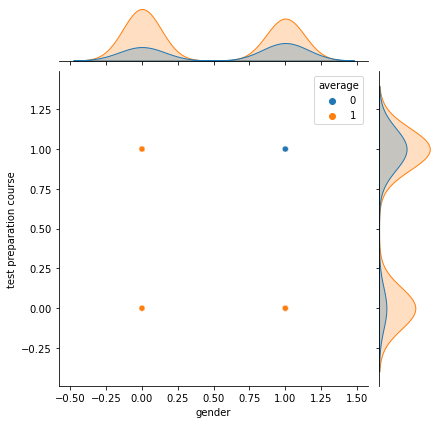

In [34]:
sns.jointplot(data=students, x="gender", y="test preparation course", hue="average")

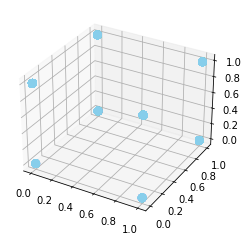

In [37]:
# plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(students['gender'], students['test preparation course'], students['average'], c='skyblue', s=60)
plt.show()